In [4]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

In [264]:
df = pd.read_csv("scraped_data.csv")

In [6]:
def get_data():
    cnx = sqlite3.connect('it-job-market.db')
    df = pd.read_sql_query("SELECT * FROM offers", cnx)
    cnx.commit()
    cnx.close()
    return df

In [7]:
df = get_data()
df

,job_title,employer,price_from,price_to,price_unit,url,contract_type,address,city,expiration_date
0,Junior / Mid Service Desk Specialist,ASTEK Polska,5000,7000,gross / mth.,https://www.pracuj.pl/praca/junior-mid-service...,B2B,"Mokotowska 1, Śródmieście, Warszawa","Warszawa, Masovian",10-09-2023
1,Programista / Programistka Prestashop,InSystem Sp. z o.o.,7000,10000,gross / mth.,https://www.pracuj.pl/praca/programista-progra...,employment,"Kijowska 1, Warszawa","Warszawa, mazowieckie",24-09-2023
2,Mid DevOps Engineer (Linux),Centuria S.A.,15000,18000,gross / mth.,https://www.pracuj.pl/praca/mid-devops-enginee...,B2B,"Sarmacka 11, Stare Miasto, Poznań","Poznań, wielkopolskie",28-08-2023
3,Oracle Apex Developer,JellyTech,15000,19300,gross / mth.,https://www.pracuj.pl/praca/oracle-apex-develo...,B2B,"Encyklopedyczna 2A, Bielany, Warszawa","Warszawa, mazowieckie",01-09-2023
4,Python Developer,JellyTech,15000,18400,gross / mth.,https://www.pracuj.pl/praca/python-developer-k...,B2B,None,"Kraków, małopolskie",01-09-2023
5,Backend .NET Engineer,DIGITEUM sp. z o.o.,15000,16700,gross / mth.,https://www.pracuj.pl/praca/backend-net-engine...,"employment, B2B","Szafarnia 11, Gdańsk","Gdańsk, Pomeranian",05-09-2023
6,BI Developer (NiFi/Airflow),JellyTech,14000,17600,gross / mth.,https://www.pracuj.pl/praca/bi-developer-nifi-...,B2B,"Encyklopedyczna 2A, Bielany, Warszawa","Warszawa, mazowieckie",28-08-2023
7,Software Engineer (SaaS Front-end AWS),Adtran,12000,17000,gross / mth.,https://www.pracuj.pl/praca/software-engineer-...,employment,"Łużycka 8c, Mały Kack, Gdynia","Gdynia, Pomeranian",28-08-2023
8,Java Developer,JellyTech,16000,25000,gross / mth.,https://www.pracuj.pl/praca/java-developer-war...,B2B,"Encyklopedyczna 2A, Bielany, Warszawa","Warszawa, mazowieckie",28-08-2023
9,Fullstack Developer,JellyTech,12000,20000,gross / mth.,https://www.pracuj.pl/praca/fullstack-develope...,B2B,"Encyklopedyczna 2A, Bielany, Warszawa","Warszawa, mazowieckie",28-08-2023


In [12]:
from geopy.extra.rate_limiter import RateLimiter
from geopy import Nominatim

locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [13]:
df.head()

,job_title,employer,price_from,price_to,price_unit,url,contract_type,address,city,expiration_date,location,point,latitude,longitude,altitude
0,Junior / Mid Service Desk Specialist,ASTEK Polska,5000,7000,gross / mth.,https://www.pracuj.pl/praca/junior-mid-service...,B2B,"Mokotowska 1, Śródmieście, Warszawa","Warszawa, Masovian",10-09-2023,"(Boston Consulting Group, 1, Mokotowska, Marsz...","(52.2175887, 21.016048, 0.0)",52.217589,21.016048,0.0
1,Programista / Programistka Prestashop,InSystem Sp. z o.o.,7000,10000,gross / mth.,https://www.pracuj.pl/praca/programista-progra...,employment,"Kijowska 1, Warszawa","Warszawa, mazowieckie",24-09-2023,"(Millennium Bank, 1, Kijowska, Port Praski, St...","(52.2504598, 21.0438381, 0.0)",52.250460,21.043838,0.0
2,Mid DevOps Engineer (Linux),Centuria S.A.,15000,18000,gross / mth.,https://www.pracuj.pl/praca/mid-devops-enginee...,B2B,"Sarmacka 11, Stare Miasto, Poznań","Poznań, wielkopolskie",28-08-2023,None,None,NaN,NaN,NaN
3,Oracle Apex Developer,JellyTech,15000,19300,gross / mth.,https://www.pracuj.pl/praca/oracle-apex-develo...,B2B,"Encyklopedyczna 2A, Bielany, Warszawa","Warszawa, mazowieckie",01-09-2023,"(2A, Encyklopedyczna, Młociny, Bielany, Warsza...","(52.303703549999994, 20.929381906502584, 0.0)",52.303704,20.929382,0.0
4,Python Developer,JellyTech,15000,18400,gross / mth.,https://www.pracuj.pl/praca/python-developer-k...,B2B,None,"Kraków, małopolskie",01-09-2023,"(None, Torino, Piemonte, Italia, (44.933143, 7...","(44.933143, 7.540121, 0.0)",44.933143,7.540121,0.0


In [266]:
df.shape

(4132, 5)

In [267]:
df.describe()

,employer,job_title,price_from,price_to,price_unit
count,4132,4132,1028,1071,1071
unique,1519,3279,154,195,8
top,Capgemini Polska,Java Developer,10 000,20 000,brutto / mies.
freq,81,33,72,61,283


In [307]:
df.dtypes

employer      string[python]
job_title     string[python]
price_from           Float64
price_to               Int64
price_unit    string[python]
dtype: object

In [269]:
def repl(x):
    if isinstance(x,str):
        output = ""
        for char in x:
            if char == ',':
                output += "."
                continue
            try:
                int(char)
                output += char
            except:
                pass
        return float(output)
#         return x.replace("&nbsp", "x")
    else:
        return x

df['price_from'] = df['price_from'].apply(repl)
df['price_to'] = df['price_to'].apply(repl)

In [82]:
df = df.infer_objects()
df.dtypes

employer      string[python]
job_title     string[python]
price_from    string[python]
price_to      string[python]
price_unit    string[python]
dtype: object

In [306]:
df = df.convert_dtypes()

In [28]:
# using dictionary to convert specific columns
convert_dict = {'employer': str,
                'job_title': str,
                'price_from': str,
                'price_to': str,
                'price_unit': str,
                }
 
df = df.astype(convert_dict)
print(df.dtypes)

employer      object
job_title     object
price_from    object
price_to      object
price_unit    object
dtype: object


In [162]:
df.sort_values(by=['price_to'], ascending=False)

,employer,job_title,price_from,price_to,price_unit
274,ITDS Polska Sp. z o.o.,Database Developer (Oracle),55000.0,70000.0,net (+ VAT) / mth.
267,ITDS Polska Sp. z o.o.,Java Developer (Micro-Services),55000.0,70000.0,net (+ VAT) / mth.
287,ITDS Polska Sp. z o.o.,Senior Java Developer,55000.0,70000.0,net (+ VAT) / mth.
301,ITDS Polska Sp. z o.o.,QA,55000.0,70000.0,net (+ VAT) / mth.
261,ITDS Polska Sp. z o.o.,Senior Backup Engineer,46200.0,54600.0,net (+ VAT) / mth.
...,...,...,...,...,...
4125,GynCentrum Sp. z o.o.,Specjalista ds. systemów zarządzania,NaN,NaN,<NA>
4127,Ingersoll Rand,Area Sales Manager,NaN,NaN,<NA>
4129,Arche Consulting Sp z o.o.,Specjalista ds. wsparcia IT z j. niemieckim,NaN,NaN,<NA>
4130,Sescom S.A.,Specjalista helpdesk z j. słowackim i czeskim,NaN,NaN,<NA>


In [195]:
df.nlargest(20, 'price_from')

,employer,job_title,price_from,price_to,price_unit
267,ITDS Polska Sp. z o.o.,Java Developer (Micro-Services),55000.0,70000.0,net (+ VAT) / mth.
274,ITDS Polska Sp. z o.o.,Database Developer (Oracle),55000.0,70000.0,net (+ VAT) / mth.
287,ITDS Polska Sp. z o.o.,Senior Java Developer,55000.0,70000.0,net (+ VAT) / mth.
301,ITDS Polska Sp. z o.o.,QA,55000.0,70000.0,net (+ VAT) / mth.
261,ITDS Polska Sp. z o.o.,Senior Backup Engineer,46200.0,54600.0,net (+ VAT) / mth.
1068,ITDS Polska Sp. z o.o.,CMDB Librarian (Splunk),46200.0,54600.0,net (+ VAT) / mth.
1070,ITDS Polska Sp. z o.o.,Splunk Engineer,46200.0,54600.0,net (+ VAT) / mth.
1603,NTIATIVE sp. z o.o.,Lead DevOps,35000.0,40000.0,net (+ VAT) / mth.
3929,TASKRABBIT POLAND sp. z o.o.,Full Stack Software Engineer,33711.0,45584.0,brutto / mies.
203,7N Sp. z o.o.,Senior Cloud Engineer,33600.0,36960.0,netto (+ VAT) / mies.


In [302]:
df[['employer','price_unit']].groupby(['price_unit']).count()

,employer
price_unit,
gross / hr.,192
gross / mth.,836


In [301]:
# df.loc[df['price_unit'] == 'brutto / mies.', 'price_unit'] = 'gross / mth.'
df['price_unit'] = np.where(df['price_unit'] == ' brutto / mies.', 'gross / mth.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' net (+ VAT) / mth.', 'gross / mth.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' netto (+ VAT) / mies.', 'gross / mth.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' netto (+ VAT) / mies.', 'gross / mth.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' gross / mth.', 'gross / mth.', df['price_unit'])

df['price_unit'] = np.where(df['price_unit'] == ' brutto / godz.', 'gross / hr.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' net (+ VAT) / hr.', 'gross / hr.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' netto (+ VAT) / godz.', 'gross / hr.', df['price_unit'])
df['price_unit'] = np.where(df['price_unit'] == ' gross / hr.', 'gross / hr.', df['price_unit'])

In [304]:
df.head()

,employer,job_title,price_from,price_to,price_unit
0,Prime Engineering Poland,Senior Test Automation Engineer,17000.0,21000,gross / mth.
1,Velis RET spółka z ograniczoną odpowiedzialnością,Project Management Specialist,5000.0,7000,gross / mth.
2,Velis RET spółka z ograniczoną odpowiedzialnością,Project Manager,7000.0,10000,gross / mth.
3,4IT SOLUTIONS sp. z o.o.,Java Fullstack Developer,90.0,130,gross / hr.
4,ITFS sp. z o.o.,Tester Automatyzujący,80.0,120,gross / hr.


In [241]:
df = df.fillna(np.nan)

In [233]:
pd.NA

<NA>

In [234]:
bool(pd.NA)

TypeError: boolean value of NA is ambiguous

In [235]:
bool(np.NaN)

True

In [236]:
np.NaN == "string"

False

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 4128
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   employer    1028 non-null   string 
 1   job_title   1028 non-null   string 
 2   price_from  1028 non-null   Float64
 3   price_to    1028 non-null   Int64  
 4   price_unit  1028 non-null   object 
dtypes: Float64(1), Int64(1), object(1), string(2)
memory usage: 50.2+ KB


In [ ]:
df = df[df['price_unit' ]

In [248]:
df.isna().sum()

employer      0
job_title     0
price_from    0
price_to      0
price_unit    0
dtype: int64

In [274]:
df = df.dropna()

In [282]:
# remove leading and trailing shitespaces
df.price_unit.str.strip()

0       netto (+ VAT) / mies.
1                gross / mth.
2                gross / mth.
3       netto (+ VAT) / godz.
4       netto (+ VAT) / godz.
                ...          
4101             gross / mth.
4122             gross / mth.
4124    netto (+ VAT) / mies.
4126             gross / mth.
4128             gross / mth.
Name: price_unit, Length: 1028, dtype: object

In [310]:

df['new_price_from'] = df.apply(lambda row: row['price_from']*160 if row['price_unit'] == "gross / hr."else row['price_from'], axis=1)
df['new_price_to'] = df.apply(lambda row: row['price_to']*160 if row['price_unit'] == "gross / hr."else row['price_to'], axis=1)

In [312]:
df.head()

,employer,job_title,price_from,price_to,price_unit,new_price_from,new_price_to
0,Prime Engineering Poland,Senior Test Automation Engineer,17000.0,21000,gross / mth.,17000.0,21000
1,Velis RET spółka z ograniczoną odpowiedzialnością,Project Management Specialist,5000.0,7000,gross / mth.,5000.0,7000
2,Velis RET spółka z ograniczoną odpowiedzialnością,Project Manager,7000.0,10000,gross / mth.,7000.0,10000
3,4IT SOLUTIONS sp. z o.o.,Java Fullstack Developer,90.0,130,gross / hr.,14400.0,20800
4,ITFS sp. z o.o.,Tester Automatyzujący,80.0,120,gross / hr.,12800.0,19200


In [313]:
df.nlargest(20, 'new_price_to')

,employer,job_title,price_from,price_to,price_unit,new_price_from,new_price_to
267,ITDS Polska Sp. z o.o.,Java Developer (Micro-Services),55000.0,70000,gross / mth.,55000.0,70000
274,ITDS Polska Sp. z o.o.,Database Developer (Oracle),55000.0,70000,gross / mth.,55000.0,70000
287,ITDS Polska Sp. z o.o.,Senior Java Developer,55000.0,70000,gross / mth.,55000.0,70000
301,ITDS Polska Sp. z o.o.,QA,55000.0,70000,gross / mth.,55000.0,70000
261,ITDS Polska Sp. z o.o.,Senior Backup Engineer,46200.0,54600,gross / mth.,46200.0,54600
1068,ITDS Polska Sp. z o.o.,CMDB Librarian (Splunk),46200.0,54600,gross / mth.,46200.0,54600
1070,ITDS Polska Sp. z o.o.,Splunk Engineer,46200.0,54600,gross / mth.,46200.0,54600
361,ITFS sp. z o.o.,Cassandra Migration Expert,270.0,330,gross / hr.,43200.0,52800
1060,Digital Hub Warsaw at Bayer,IT Enterprise Architect – Application Moderniz...,31000.0,47000,gross / mth.,31000.0,47000
1061,Digital Hub Warsaw at Bayer,Digital Lead - Supply Chain Planning,32000.0,47000,gross / mth.,32000.0,47000


In [5]:
df = pd.read_csv("it-job-market-ready.csv")

In [55]:
df.head()

,job_title,employer,min_salary,max_salary,price_unit,url,contract_type,address,city,expiration_date,scraping_datetime,location,point,latitude,longitude,altitude
0,Senior Java Developer (Spring),Novaris Sp. z o.o.,24000,32000,gross / mth.,https://www.pracuj.pl/praca/senior-java-develo...,B2B,Warszawa,"Warszawa, mazowieckie",01-10-2023,04/09/2023 18:47:31,"Warszawa, województwo mazowieckie, Polska","(52.2337172, 21.071432235636493, 0.0)",52.233717,21.071432,0.0
1,Technical Writer,7N Sp. z o.o.,13440,15120,gross / mth.,https://www.pracuj.pl/praca/technical-writer-w...,B2B,"Puławska 182, Mokotów, Warszawa","Warszawa, Masovian",30-09-2023,04/09/2023 18:47:32,"Puławska, Królikarnia, Ksawerów, Mokotów, Wars...","(52.186109, 21.0247231, 0.0)",52.186109,21.024723,0.0
2,Senior Flutter Developer - Smart City,INCUBLY SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,16000,21000,gross / mth.,https://www.pracuj.pl/praca/senior-flutter-dev...,"employment, B2B","aleja marsz. Józefa Piłsudskiego 24, Śródmieśc...","Łódź, Łódź",01-10-2023,04/09/2023 18:47:37,"Enel-med, 24, Aleja Marszałka Józefa Piłsudski...","(51.761064, 19.4665044, 0.0)",51.761064,19.466504,0.0
3,Business Intelligence (Power BI) Developer,CLOUDFIDE SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,12000,25000,gross / mth.,https://www.pracuj.pl/praca/business-intellige...,"employment, B2B","Jana Nowaka-Jeziorańskiego 53a, Praga-Południe...","Warszawa, Masovian",07-09-2023,04/09/2023 18:47:37,"53A, Jana Nowaka-Jeziorańskiego, Osiedle Orlik...","(52.228971, 21.073322478236857, 0.0)",52.228971,21.073322,0.0
4,Senior UX/UI Designer,4SOFT SPÓŁKA AKCYJNA,15000,22000,gross / mth.,https://www.pracuj.pl/praca/senior-ux-ui-desig...,B2B,"Łaciarska 4, Stare Miasto, Wrocław","Wrocław, Lower Silesia",22-09-2023,04/09/2023 18:47:44,"Wicekonsulat Węgier, 4, Łaciarska, Dzielnica C...","(51.1081899, 17.0351807, 0.0)",51.108190,17.035181,0.0


In [9]:
data = df[['city']].groupby('city', as_index=False).count()

In [18]:
data['city'] = data['city'].apply(lambda x: x.split(", ")[0])

KeyError: 'city'

In [19]:
data

0                   Balice (pow. krakowski)
1                                 Białystok
2     Bielany Wrocławskie (pow. wrocławski)
3                             Bielsko-Biała
4                             Bielsko-Biała
                      ...                  
65                                zagranica
66                                    Łomża
67                                     Łódź
68                                     Łódź
69                                 Świdnica
Name: city, Length: 70, dtype: object

In [93]:
def custom_replace(x):
    to_replace = ["(", ")", "-", "+", ",", "/", "–", "&"]
    replaced = x
    for char in to_replace:
        replaced = replaced.replace(char, "")
    print(x, "------", replaced)
    return replaced
        
words_dict = {}
job_title_list = df['job_title'].tolist()
for i in range(len(job_title_list)):
    job_title_list[i] = custom_replace(job_title_list[i])

Senior Java Developer (Spring) ------ Senior Java Developer Spring
Technical Writer ------ Technical Writer
Senior Flutter Developer - Smart City ------ Senior Flutter Developer  Smart City
Business Intelligence (Power BI) Developer ------ Business Intelligence Power BI Developer
Senior UX/UI Designer ------ Senior UXUI Designer
PHP Developer (Symfony) ------ PHP Developer Symfony
Specjalista Wsparcia Technicznego - IT Support Specialist ------ Specjalista Wsparcia Technicznego  IT Support Specialist
SAP Specialist (PI/PO) ------ SAP Specialist PIPO
IT Service Owner ------ IT Service Owner
Administrator Jira ------ Administrator Jira
Test automation Engineer with Python ------ Test automation Engineer with Python
Junior Pentester ------ Junior Pentester
Inżynier ds. utrzymania aplikacji ------ Inżynier ds. utrzymania aplikacji
Junior IT Specialist ------ Junior IT Specialist
DevOps Engineer ------ DevOps Engineer
Data Analyst ------ Data Analyst
Frontend Developer (Angular) ------ Fron

In [94]:
job_title_list

['Senior Java Developer Spring',
 'Technical Writer',
 'Senior Flutter Developer  Smart City',
 'Business Intelligence Power BI Developer',
 'Senior UXUI Designer',
 'PHP Developer Symfony',
 'Specjalista Wsparcia Technicznego  IT Support Specialist',
 'SAP Specialist PIPO',
 'IT Service Owner',
 'Administrator Jira',
 'Test automation Engineer with Python',
 'Junior Pentester',
 'Inżynier ds. utrzymania aplikacji',
 'Junior IT Specialist',
 'DevOps Engineer',
 'Data Analyst',
 'Frontend Developer Angular',
 'Analityk systemowy',
 'Tester Automatyzujący  QA Engineer',
 'iOS Developer mPilot',
 'iOS Developer mPilot',
 'AUTOSAR Engineer',
 'Backend Engineer TS Node AWS',
 'Senior QA with Ruby',
 'Ruby on Rails Developer',
 'Senior Java  DevOps GCP Engineer',
 'Konsultant Microsoft Dynamics 365 FinanceProject',
 'Integrator WSO2',
 'Business Analyst with German External Project mfd',
 'Junior Mobile Developer',
 'React Developer',
 'Junior React Developer',
 'Java Developer Camunda',
 'S

In [95]:
for job in job_title_list:
    for word in job.split():
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

In [96]:
words_dict

{'Senior': 149,
 'Java': 89,
 'Developer': 347,
 'Spring': 2,
 'Technical': 11,
 'Writer': 4,
 'Flutter': 2,
 'Smart': 6,
 'City': 6,
 'Business': 25,
 'Intelligence': 3,
 'Power': 6,
 'BI': 10,
 'UXUI': 7,
 'Designer': 19,
 'PHP': 34,
 'Symfony': 4,
 'Specjalista': 33,
 'Wsparcia': 2,
 'Technicznego': 1,
 'IT': 84,
 'Support': 26,
 'Specialist': 42,
 'SAP': 17,
 'PIPO': 1,
 'Service': 10,
 'Owner': 10,
 'Administrator': 29,
 'Jira': 1,
 'Test': 14,
 'automation': 1,
 'Engineer': 166,
 'with': 27,
 'Python': 22,
 'Junior': 31,
 'Pentester': 2,
 'Inżynier': 15,
 'ds.': 46,
 'utrzymania': 2,
 'aplikacji': 2,
 'DevOps': 41,
 'Data': 37,
 'Analyst': 32,
 'Frontend': 35,
 'Angular': 26,
 'Analityk': 23,
 'systemowy': 6,
 'Tester': 21,
 'Automatyzujący': 4,
 'QA': 18,
 'iOS': 8,
 'mPilot': 2,
 'AUTOSAR': 1,
 'Backend': 28,
 'TS': 2,
 'Node': 3,
 'AWS': 10,
 'Ruby': 4,
 'on': 3,
 'Rails': 3,
 'GCP': 4,
 'Konsultant': 11,
 'Microsoft': 1,
 'Dynamics': 1,
 '365': 1,
 'FinanceProject': 1,
 'Inte

In [97]:
sorted_words = sorted(words_dict.items(), key=lambda x:x[1], reverse=True)

In [98]:
words_df = pd.DataFrame(sorted_words, columns=['Word', 'Count'])

In [99]:
words_df

,Word,Count
0,Developer,347
1,Engineer,166
2,Senior,149
3,Java,89
4,IT,84
...,...,...
647,Informatyki,1
648,manualna,1
649,CAM,1
650,Veeva,1


In [120]:
words_to_drop = ["of", "in", "z", "for", "ds."]
df_filtered = words_df[~words_df['Word'].isin(words_to_drop)]
df_filtered

,Word,Count
0,Developer,347
1,Engineer,166
2,Senior,149
3,Java,89
4,IT,84
...,...,...
647,Informatyki,1
648,manualna,1
649,CAM,1
650,Veeva,1


In [121]:
words_to_plot = df_filtered.iloc[:10,:]

In [122]:
words_to_plot

,Word,Count
0,Developer,347
1,Engineer,166
2,Senior,149
3,Java,89
4,IT,84
5,Manager,55
6,Fullstack,53
8,Specialist,42
9,DevOps,41
10,Software,40


<Axes: xlabel='Word', ylabel='Count'>

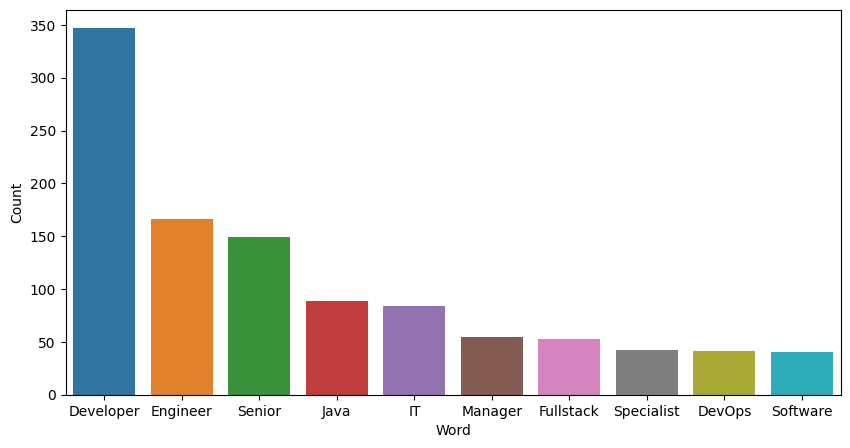

In [123]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))

sns.barplot(data=words_to_plot, x="Word", y="Count")

In [124]:
i

990

In [6]:
df[['contract_type']].groupby('contract_type', as_index=False).count()

,contract_type
0,B2B
1,employment
2,"employment, B2B"
3,"employment, mandate"
4,"employment, mandate, B2B"
5,mandate
6,"mandate, B2B"


In [8]:
df.describe()

,min_salary,max_salary,days_to_expiration,middle_price,latitude,longitude,altitude
count,991.000000,991.000000,991.000000,991.000000,908.000000,908.000000,908.0
mean,14570.880928,19867.100908,14.937437,17218.990918,51.953308,19.729294,0.0
std,6899.714176,8006.485180,11.786061,7319.548878,1.418207,4.641970,0.0
min,2000.000000,2200.000000,-1.000000,2100.000000,30.271129,-97.743700,0.0
25%,9000.000000,14000.000000,9.000000,11750.000000,51.253584,19.022932,0.0
50%,14280.000000,20000.000000,16.000000,17000.000000,52.227424,20.947201,0.0
75%,20000.000000,25200.000000,21.000000,22400.000000,52.251149,21.021912,0.0
max,50000.000000,58400.000000,268.000000,54200.000000,64.145981,23.159168,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            991 non-null    object 
 1   employer             991 non-null    object 
 2   min_salary           991 non-null    int64  
 3   max_salary           991 non-null    int64  
 4   price_unit           991 non-null    object 
 5   url                  991 non-null    object 
 6   contract_type        982 non-null    object 
 7   address              991 non-null    object 
 8   city                 991 non-null    object 
 9   scraping_datetime    991 non-null    object 
 10  clickable_job_title  991 non-null    object 
 11  days_to_expiration   991 non-null    int64  
 12  middle_price         991 non-null    float64
 13  location             908 non-null    object 
 14  point                991 non-null    object 
 15  latitude             908 non-null    flo

In [19]:
print(df[df['contract_type'].isnull()])

                                 job_title           employer  min_salary   
105  Senior React & React Native Developer           Lemon.io       20000  \
128   Senior AI/Machine Learning Developer           Lemon.io       22000   
129         Senior Android & iOS Developer           Lemon.io       22000   
130     Senior Full-stack Python Developer           Lemon.io       20000   
131       Senior Full stack Java Developer           Lemon.io       22000   
132             Senior PHP/React Developer           Lemon.io       20000   
133            Senior Full-stack Developer           Lemon.io       20000   
495                             SQL Intern  GGS IT Consulting        3500   
837                     Junior QA Engineer     JIP sp. z o.o.        6000   

     max_salary    price_unit   
105       33000  gross / mth.  \
128       37000  gross / mth.   
129       32500  gross / mth.   
130       37000  gross / mth.   
131       33000  gross / mth.   
132       31000  gross / mth.  

In [18]:
print(df[df['contract_type'].isnull()]['url'].tolist())

['https://www.pracuj.pl/praca/senior-react-react-native-developer-warszawa,oferta,1002814797', 'https://www.pracuj.pl/praca/senior-ai-machine-learning-developer-warszawa,oferta,1002815146', 'https://www.pracuj.pl/praca/senior-android-ios-developer-warszawa,oferta,1002815147', 'https://www.pracuj.pl/praca/senior-full-stack-python-developer-warszawa,oferta,1002815143', 'https://www.pracuj.pl/praca/senior-full-stack-java-developer-warszawa,oferta,1002815148', 'https://www.pracuj.pl/praca/senior-php-react-developer-warszawa,oferta,1002815151', 'https://www.pracuj.pl/praca/senior-full-stack-developer-warszawa,oferta,1002815153', 'https://www.pracuj.pl/praca/sql-intern-krakow-cystersow-13,oferta,1002802113', 'https://www.pracuj.pl/praca/junior-qa-engineer-poznan-szarych-szeregow-43,oferta,1002821481']
